In [2]:
%run my_functions.ipynb

SyntaxError: unterminated string literal (detected at line 5) (961731520.py, line 5)

SyntaxError: unterminated string literal (detected at line 5) (961731520.py, line 5)

### SAT Problem 1

f(x0,x1,x2) = (x0 OR x1 OR x2 OR x3) AND (~x0 OR x1 OR x2 OR ~x3)

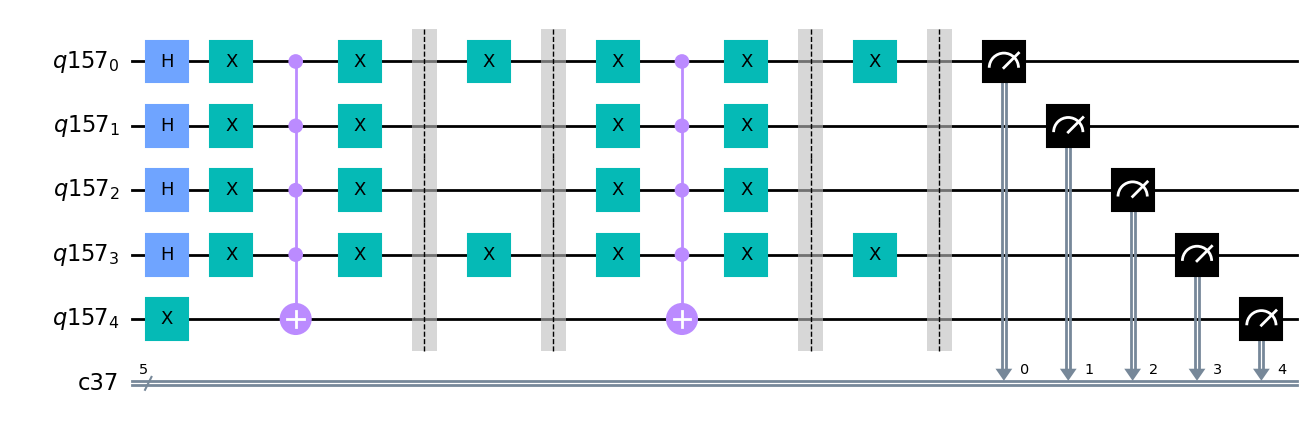

In [74]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
qc = QuantumCircuit(qr,cr)

#Creating superposition of entire search space
qc.h(range(4))

#Oracle 1
#Implementing clause 1 (Logical OR operation)
qc.x(qr[:])
qc.mct([qr[0],qr[1],qr[2],qr[3]],qr[-1])
qc.x(qr[0:4])
qc.barrier()


#Implementing clause 2
positive_var = [1,2]
negative_var = [0,3]

#negating the variables
qc.x(qr[i] for i in negative_var)
qc.barrier()

#Oracle 2
#Logical OR operation
qc.x(qr[0:4])
qc.mct([qr[i] for i in range(4)],qr[[-1]])
qc.x(qr[0:4])
qc.barrier()

#Bringing the negated variables to original form
qc.x(qr[i] for i in negative_var)
qc.barrier()
     
qc.measure(qr[:],cr[:])
qc.draw('mpl')


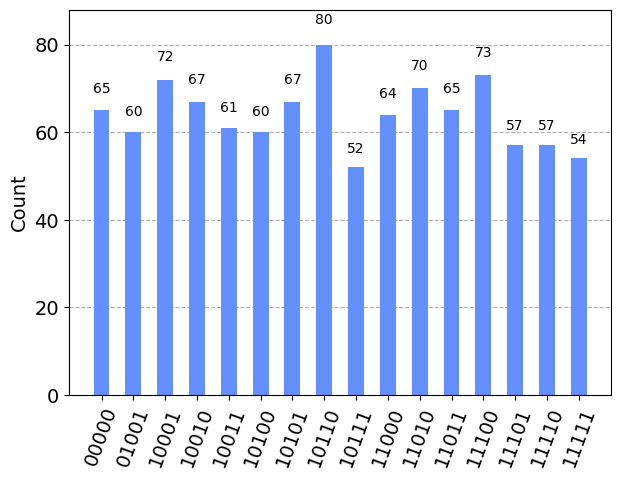

In [75]:
result = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(result)

In [76]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': '0.7.0'}